# Robustness to units mismatch

In [27]:
require('cowplot')
library('ggplot2')
source(file.path('..', 'commons','get_expected_pval_and_equiv_z.R'))
source(file.path('..', 'commons','plot_grid_methods_color_within.R'))
source(file.path('..', 'commons','multiplot.R'))
source(file.path('..', 'commons','prepare_data.R'))
source(file.path('..', 'commons','plot_lib.R'))
source(file.path('..', 'commons','plot_qq_p.R'))
theme_set(theme_gray()) # switch to default ggplot2 theme for good
theme_update(panel.background = element_rect(fill = "grey95"))
# theme_set(theme_gray() + theme(panel.background = element_blank()))
# theme_set(theme_bw() + theme(panel.border = element_blank())) # switch to default ggplot2 theme for good

We look how contrast-based methods are affected by the units issue.

## One-sample tests

### Load data from the CSV files

In [28]:
# allsimudat_btw0 <- load_data_from_csv('^test1_k025_n20_btw0_.*', '/Volumes/camille/IBMA_simu/')
allsimudat_btw1 <- load_data_from_csv('^test1_k025_n20_btw1_.*', '/Volumes/camille/IBMA_simu/')
allsimudat <- rbind(allsimudat_btw1)

[1] "Reading from  /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/units_mismatch/../data/allsimudat_test1_k025_n20_btw1_.csv"


Select contrast-based methods.

We look at $τ^2 = 1$ and only valid scenarii for each method:
 - MFX GLM: $σ^2_i/n_i$ constant
 - RFX GLM: anything
 - Contrast Permutation: anything 
 - Z Permutation: anything 
 - MFX Stouffers: anything 

In [29]:
# best_con_data_1 <- subset(con_data_1, 
#     (methods %in% c("megaMFX") & Between==1) | 
#     (methods %in% c("megaRFX") & Between==1) | 
#     (methods %in% c("megaFFX_FSL") & Between==0) |
#     (methods %in% c("permutCon")& Between==1)
#     )

# best_con_data_1_nom_ok <- subset(allsimudat, 
#     (methods %in% c("megaMFX") & withinVariation<8) |
#     (methods %in% setdiff(con_methods, c("megaMFX"))))

# best_con_data_3 <- subset(con_data_3, 
#     ((methods %in% c("megaMFX") & Between==1) | 
#      (methods %in% c("megaRFX"))  | 
#      (methods %in% c("megaFFX_FSL") & Between==0) |
#      (methods %in% c("permutCon"))
#     ) & nStudies==50)

### Plots

### Main figure

pdf 
  2

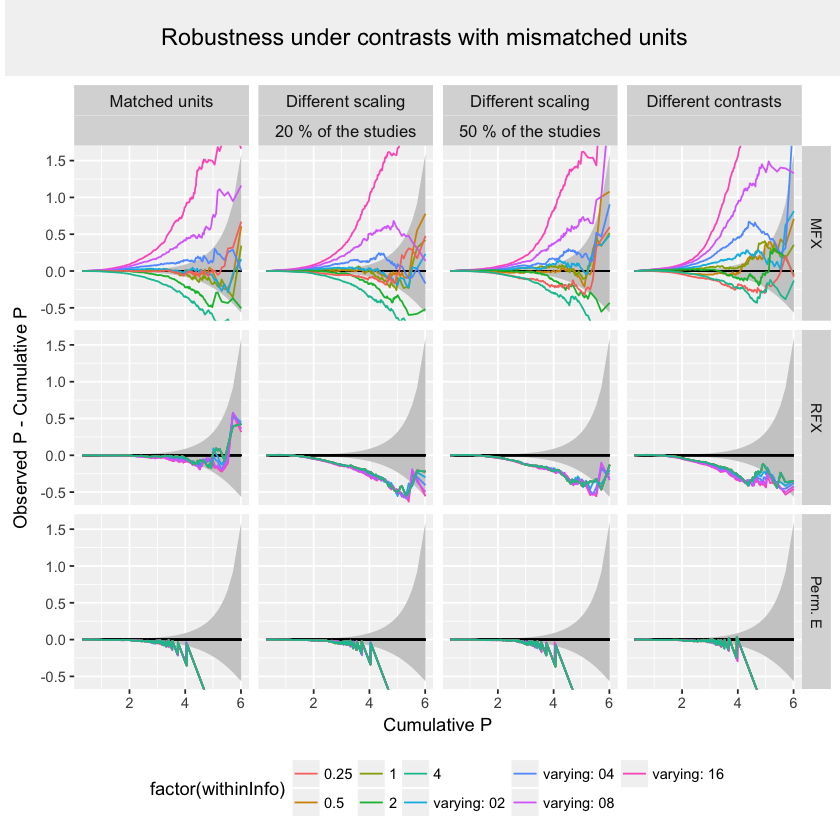

In [30]:
source(file.path('..', 'commons','plot_grid_methods_color_within.R'))
units_plot <- function(data, max_z=NA, lim=NA){
    
    con_methods <- c("megaMFX","megaRFX","permutCon")
    con_data <- subset(data, is.finite(expectedz) & expectedz>0  &  methods %in% con_methods)
    
    p <- plot_qq_p(list(con_data),  
              methods~unitMism+soft2, 
              '', 
              mult=FALSE, lim=lim, filename=NA, max_z=max_z) + 
        theme(legend.position="bottom")

    title <- ggdraw() + draw_label(
        'Robustness under contrasts with mismatched units') 
    p <- plot_grid(title, p, ncol=1, rel_heights=c(0.1, 1))

    return(p)
}

p <- units_plot(allsimudat)

# print on screen
print(p)

# Save to pdf
pdf(paste("units.pdf", sep=""))
print(p)
dev.off()

##  Two-sample tests

### Load data from the CSV files

In [31]:
# allsimudat2_btw0 <- load_data_from_csv('^test2_k025_n20_btw0_.*', '/Volumes/camille/IBMA_simu/')
allsimudat2_btw1 <- load_data_from_csv('^test2_k025_n20_btw1_.*', '/Volumes/camille/IBMA_simu/')
allsimudat2 <- rbind(allsimudat2_btw1)

[1] "Reading from  /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/units_mismatch/../data/allsimudat_test2_k025_n20_btw1_.csv"


In [32]:
best_con_data_2 <- subset(allsimudat2, 
    ((methods %in% c("megaMFX") & Between==1) | 
     (methods %in% c("megaRFX") & Between==1) | 
     (methods %in% c("megaFFX_FSL") & Between==0) |
     (methods %in% c("permutCon"))
    ))

# best_con_data_2_nom_ok <- subset(best_con_data_2, 
#     (methods %in% c("megaMFX") & withinVariation<4) |
#     (methods %in% setdiff(methods, c("megaFFX_FSL", "megaMFX"))))

### Main figure

pdf 
  2

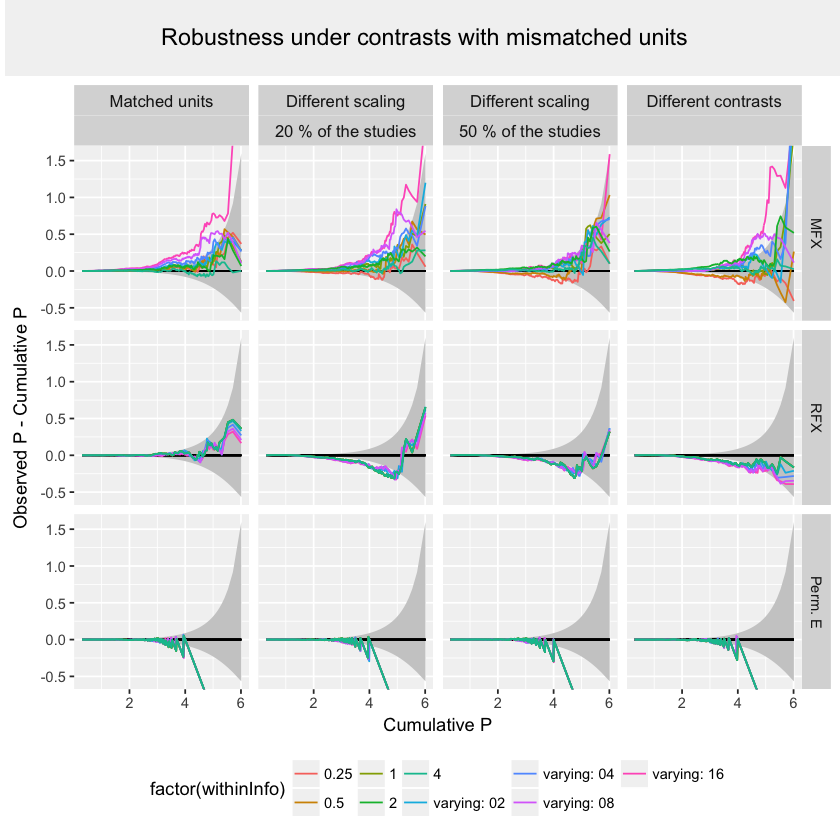

In [33]:
p <- units_plot(best_con_data_2)

# print on screen
print(p)

# Save to pdf
pdf(paste("units_test2.pdf", sep=""))
print(p)
dev.off()

## Unbalanced two-sample tests

### Load data from the CSV files

In [34]:
allsimudat3_btw1 <- load_data_from_csv('^test3_k025_n20_btw1_.*', '/Volumes/camille/IBMA_simu/')
allsimudat3 <- rbind(allsimudat3_btw1)

[1] "Reading from  /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/units_mismatch/../data/allsimudat_test3_k025_n20_btw1_.csv"


In [35]:
# con_data_3 <- subset(allsimudat3, is.finite(expectedz) & expectedz>0 & methods %in% con_methods)
best_con_data_3 <- subset(allsimudat3, 
    ((methods %in% c("megaMFX") & Between==1) | 
     (methods %in% c("megaRFX") )  | 
     (methods %in% c("megaFFX_FSL") & Between==0) |
     (methods %in% c("permutCon"))
    ) & nStudies==50)

# plot_unit_mismatch(
#     subset(best_con_data_3,((methods %in% c("megaRFX") & Between==1) | !(methods %in% c("megaRFX")))),
#     'unbalanced two-sample test', mult=FALSE, single=TRUE, lim=NA,
#      filename=file.path("..", "..", "zmeta_paper", "figures", "unitmimatch_test3"), max_z=4)

pdf 
  2

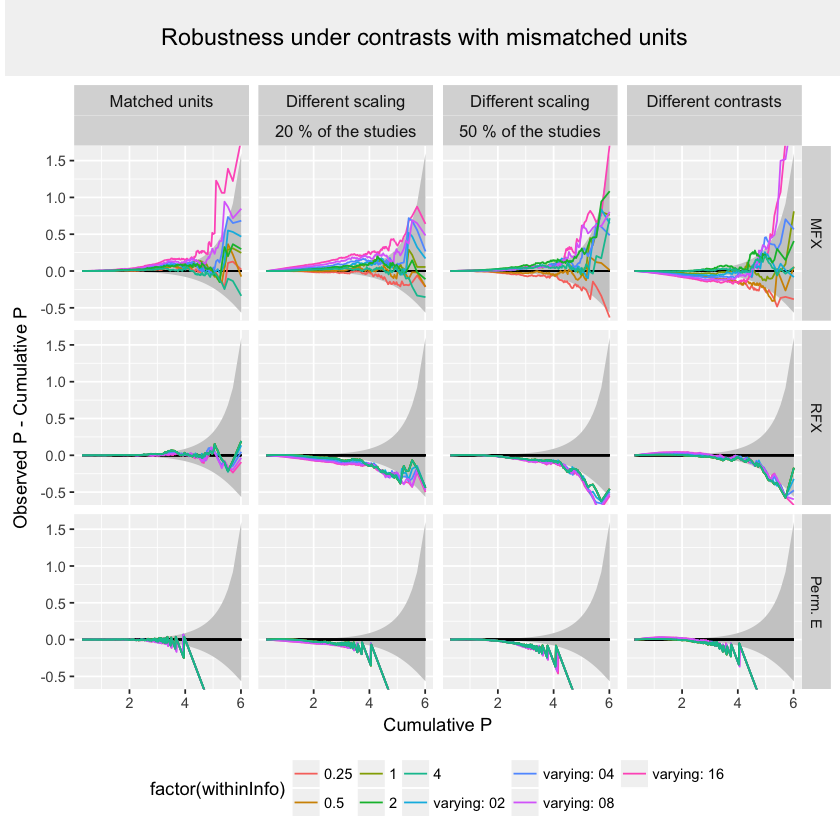

In [36]:
p <- units_plot(
    subset(best_con_data_3,((methods %in% c("megaRFX") & Between==1) 
                            | !(methods %in% c("megaRFX")))))

# print on screen
print(p)

# Save to pdf
pdf(paste("units_test3.pdf", sep=""))
print(p)
dev.off()

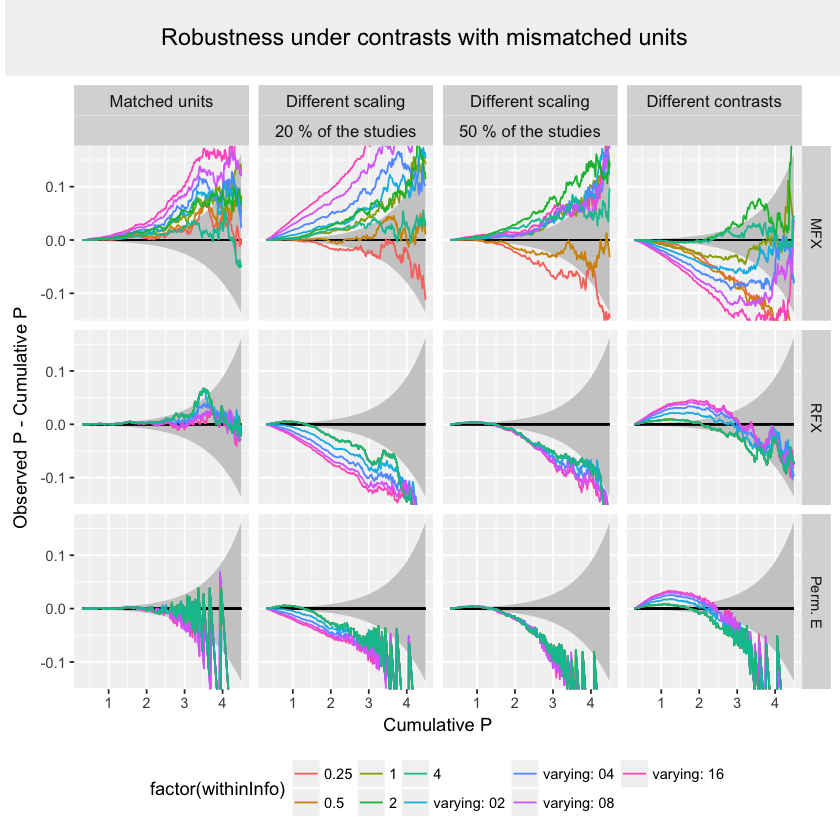

In [37]:
### Think about the above plot: with max_z=4, we see a quite different picture...

p <- units_plot(
    subset(best_con_data_3,((methods %in% c("megaRFX") & Between==1) 
                            | !(methods %in% c("megaRFX")))), max_z=4)

print(p)

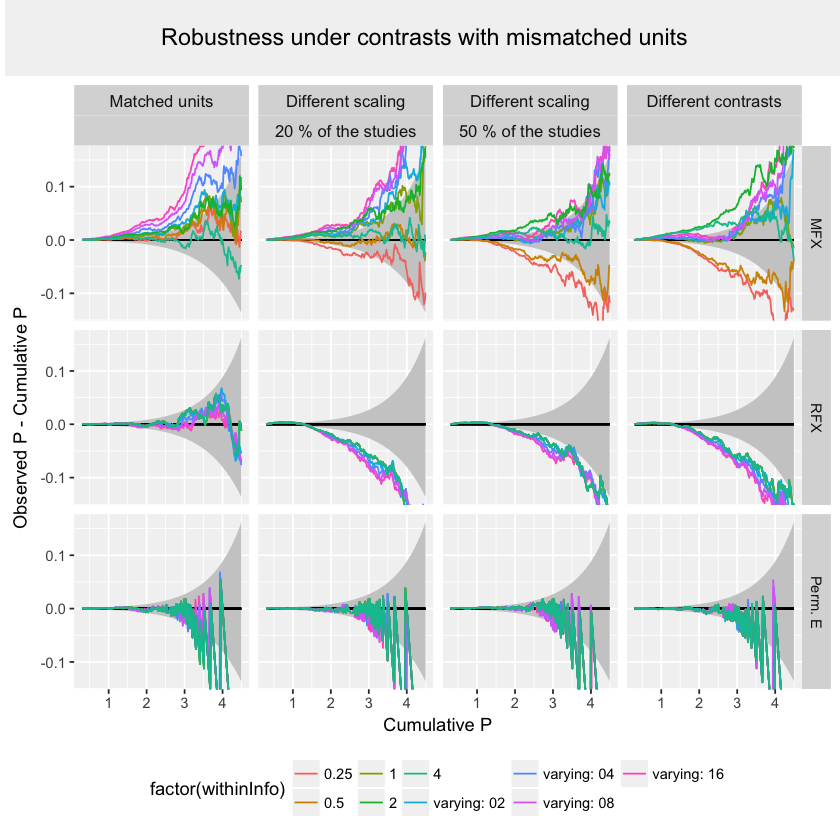

In [38]:
### Think about the above plot: with max_z=4, we see a quite different picture...

p <- units_plot(
    subset(best_con_data_2,((methods %in% c("megaRFX") & Between==1) 
                            | !(methods %in% c("megaRFX")))), max_z=4)

print(p)

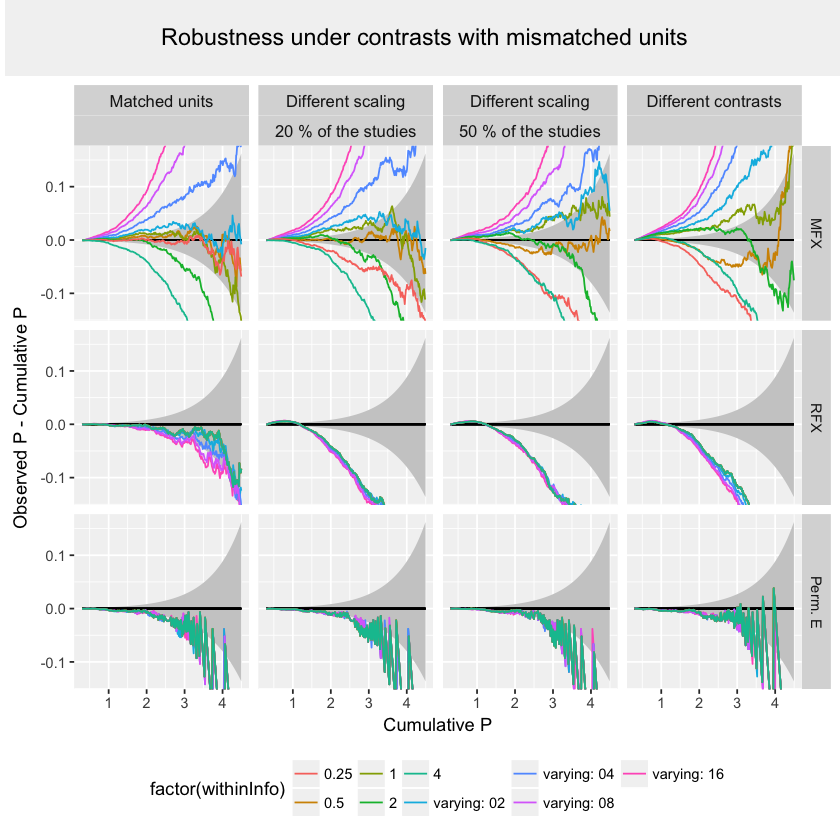

In [39]:
### Think about the above plot: with max_z=4, we see a quite different picture...

p <- units_plot(allsimudat, max_z=4)

print(p)